In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.cm as cm
import cmocean.cm as cmo

In [2]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

client = Client(n_workers=50, threads_per_worker=1, memory_limit='4GB')

2022-06-19 16:12:11,765 - distributed.diskutils - INFO - Found stale lock file and directory '/home/a/a270088/PYTHON/nextgems/km4/fesom_interpolated/dask-worker-space/worker-bprt8o1p', purging
2022-06-19 16:12:11,771 - distributed.diskutils - INFO - Found stale lock file and directory '/home/a/a270088/PYTHON/nextgems/km4/fesom_interpolated/dask-worker-space/worker-qub5ixqs', purging
2022-06-19 16:12:11,776 - distributed.diskutils - INFO - Found stale lock file and directory '/home/a/a270088/PYTHON/nextgems/km4/fesom_interpolated/dask-worker-space/worker-833xzpa8', purging
2022-06-19 16:12:11,782 - distributed.diskutils - INFO - Found stale lock file and directory '/home/a/a270088/PYTHON/nextgems/km4/fesom_interpolated/dask-worker-space/worker-o4muuz5k', purging
2022-06-19 16:12:11,787 - distributed.diskutils - INFO - Found stale lock file and directory '/home/a/a270088/PYTHON/nextgems/km4/fesom_interpolated/dask-worker-space/worker-5c6r4km4', purging
2022-06-19 16:12:11,792 - distribut

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 50
Total threads: 50,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34403,Workers: 50
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 50
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:46225,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/32811/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:38389,


In [4]:
path_to_output = "/work/ab0995/a270088/NextGems_public/FESOM_interpolated/tco2559-ng5/MLD2/"
json_file="MLD2.fesom.json"

In [5]:
data = xr.open_zarr(f"reference::{path_to_output}/{json_file}", consolidated=False)

In [6]:
data

<xarray.Dataset>
Dimensions:    (time: 7584, depth: 1, lat: 2700, lon: 5400)
Coordinates:
  * depth      (depth) float64 0.0
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20T00:56:00 ... 2020-12-31T23:56:00
Data variables:
    MLD2       (time, depth, lat, lon) float32 dask.array<chunksize=(1, 1, 1350, 2700), meta=np.ndarray>
Attributes: (12/21)
    FESOM_ClimateDataPath:               /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_MeshPath:                      /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       469e74b1
    FESOM_include_fleapyear:             -1
    ...                                  ...
    FESOM_which_ALE:                     zstar
    box:                                 -180, 180, -90, 90
    data:                                /work/bm1235/a270046/cycle2-sync/tco...
    influence:                           80000
    interp:                              nn
    meshpath:                            /work/ab0995/a270088/meshes/NG5

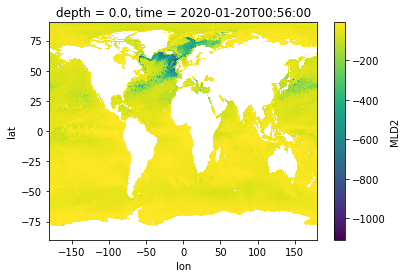

In [7]:
data['MLD2'][0,0,:,:].plot()

In [7]:
data['MLD2'].sel(time='2020-02')

<xarray.DataArray 'MLD2' (time: 696, depth: 1, lat: 2700, lon: 5400)>
dask.array<getitem, shape=(696, 1, 2700, 5400), dtype=float32, chunksize=(1, 1, 1350, 2700), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 0.0
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-02-01T00:56:00 ... 2020-02-29T23:56:00

In [7]:
mean_02 = data['MLD2'].sel(time='2020-02').mean(dim='time').compute()

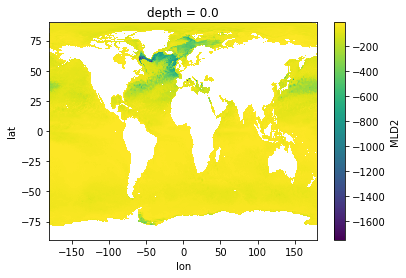

In [8]:
mean_02.plot()